# Window Size Selection for Unsupervised Time Series Analytics
The ClaSP algorithm uses a window size to differentiate subsequences from different segments. This parameter is not special to ClaSP, but arguably, one of the most occuring parameters in unsupervised time series analytics, such as in segmentation, anomaly detection or motif discovery. In many applications, the window size should capture the length of a single temporal pattern in a time series (TS), e.g. one heart beat in a ECG recording or one in and out breath in a respiratory signal. Many TS data ming algorithms (TSDM) still provide meaningful results, if you provide a multiple or fraction of the optimal window size, however it is often desired to estimate this parameter automatically, as opposed to setting it manually.

In a <a href="https://doi.org/10.1007/978-3-031-24378-3_6" target="_blank">survey</a> published at AALTD'22, we reviewed classical and more recent window size selection strategies and conducted a benchmark study to test the performances if applied with state-of-the-art TSDM algorithms. We found that the dominant Fourier frequency `fft`, the highest autocorrelation `acf` and subsequence summary statistics `suss` lead to good results in many instances. Therefore, we implemented these methods in `claspy`, to be used for ClaSP as well as for any other TSDM algorithms that you use in your projects. In this notebook, we show you how to use them.

In [25]:
import matplotlib.pyplot as plt

from claspy.data_loader import load_tssb_dataset
from claspy.window_size import dominant_fourier_frequency, highest_autocorrelation, suss

In the ClaSPy package, we provide access to the <a href="https://github.com/ermshaua/time-series-segmentation-benchmark" target="_blank">"Time Series Segmentation Benchmark"</a> (TSSB) via a data loader. We first load the annoatated benchmark as a pandas DataFrame to use an example from it for illustration.

In [26]:
df = load_tssb_dataset()
df

,dataset,window_size,cps,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
...,...,...,...,...
70,UWaveGestureLibraryX,10,"[600, 1131, 1652, 2193]","[-0.889766, 0.722005, 0.869297, -0.553167, -0...."
71,UWaveGestureLibraryY,10,"[600, 1131, 1652, 2193]","[-1.523467, -0.106794, 0.190361, 0.979247, 0.3..."
72,UWaveGestureLibraryZ,10,"[600, 1131, 1652, 2193]","[-0.527058, 0.416111, -0.524027, 0.41141, 0.12..."
73,WordSynonyms,10,"[202, 2227]","[-1.183581, -0.514028, -0.480539, -0.394855, -..."


## Determining a Window Size
As an exmaple, we use the 10 first heartbeats from the <a href="http://timeseriesclassification.com/description.php?Dataset=ECG200" target="_blank">ECG200</a> TS, each capturing roughly 25 data points. A good estimated window size would typically range between 13-50 data points, including at least half of a heartbeat up to two instances, depending on the specific application.

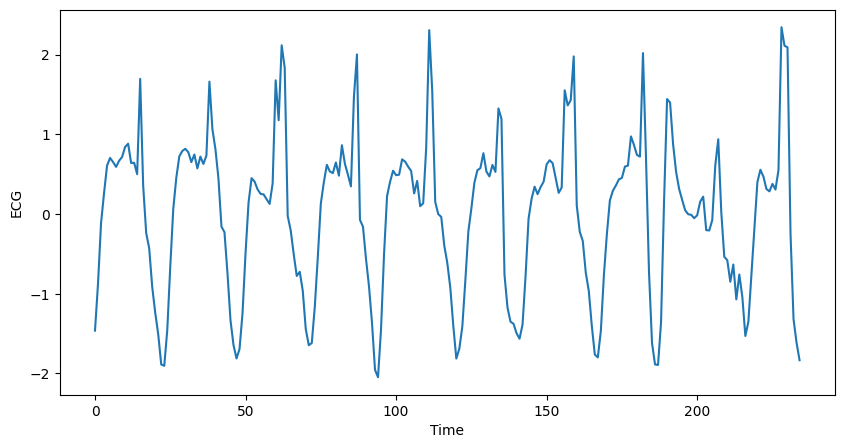

In [27]:
row = df.iloc[20,:]
time_series = row.time_series[10:245]

_, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(time_series)
ax.set_xlabel("Time")
ax.set_ylabel("ECG")
plt.show()

Instead of choosing a window size manually, which can be laborious for large collections of TS, let's investigate what the window size selection strategies compute.

In [28]:
print(f"FFT: {dominant_fourier_frequency(time_series)}")
print(f"ACF: {highest_autocorrelation(time_series)}")
print(f"SuSS: {suss(time_series)}")

FFT: 23
ACF: 48
SuSS: 28


For this specific instance, FFT and SuSS suggest taking one heart beat as a window size (23 or 28 data points), while ACF proposes to take two (48 data points). All three algorithms give reasonable suggestions here and their performance will depend on your specific application. In practice, we find that these algorithms work really well when the TS are periodic, as opposed to chaotic. For ClaSP, we use SuSS as a default choice, which produces the best results. If you are interested in a more elaborate discussion of these and other window size selection algorithms, we refer you to our <a href="https://doi.org/10.1007/978-3-031-24378-3_6" target="_blank">paper</a>.